In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# f_type: 0 - parallel, 1 - counter
f_type = 0

if f_type == 0:
    dfs = pd.read_csv("../../py_data/HEXPractice/parallel.csv", header=0)
elif f_type == 1:
    dfs = pd.read_csv("../../py_data/HEXPractice/counter.csv", header=0)

In [3]:
dfs.head()

,Day,F1m,F1i,F1o,F1v,F1D,F1Re,F1h,dP,Sigma1,...,F2i,F2o,F2v,F2D,F2Re,F2h,Sigma2,Rf2,UA,Q
0,1,6.165044,274.096089,295.923870,0.007034,0.6,13082.629695,44.960444,0.012247,0.000000e+00,...,620.025757,601.581740,0.009192,0.5,4595.943163,23.949937,0.0,0.0,1.945018,63247.540711
1,2,7.355776,274.534244,288.706959,0.008392,0.6,15609.442452,51.782679,0.017281,3.241448e-08,...,601.449694,578.843042,0.005810,0.5,2904.889680,16.592368,0.0,0.0,1.590971,48998.116374
2,3,7.195550,274.786601,293.607169,0.008209,0.6,15269.433722,50.878343,0.016554,4.058205e-08,...,615.128064,595.648472,0.008759,0.5,4379.265332,23.042291,0.0,0.0,1.985205,63649.440587
3,4,4.123915,282.080236,308.130725,0.004705,0.6,8751.220861,32.593392,0.005604,6.040530e-08,...,602.070703,587.165857,0.009081,0.5,4540.278087,23.717593,0.0,0.0,1.689599,50492.100345
4,5,7.242164,302.004015,318.354824,0.008263,0.6,15368.356112,51.141882,0.016764,1.507969e-07,...,608.898284,590.777980,0.008233,0.5,4116.484370,21.929354,0.0,0.0,1.924824,55655.157976


In [4]:
x = dfs["Day"].to_numpy()

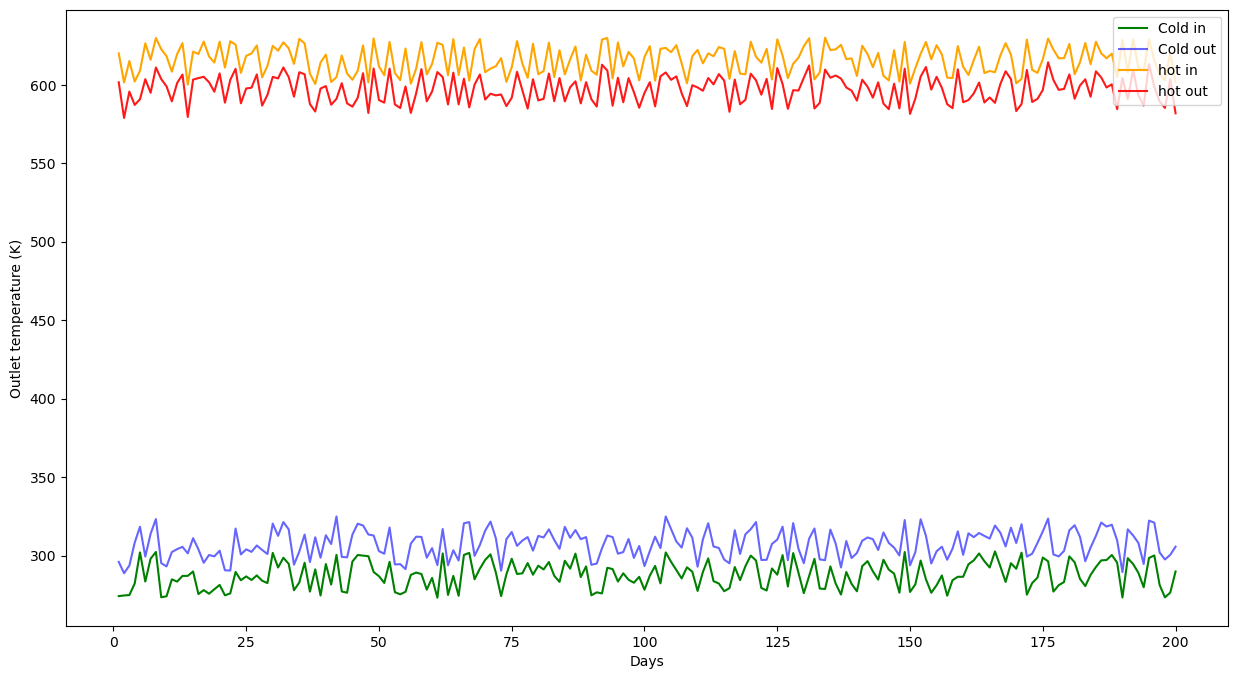

In [5]:
# outlet temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(x, dfs["F1i"].to_numpy(), c="green", label="Cold in")
ax.plot(x, dfs["F1o"].to_numpy(), c="blue", alpha=0.6, label="Cold out")
ax.plot(x, dfs["F2i"].to_numpy(), c="orange", label="hot in")
ax.plot(x, dfs["F2o"].to_numpy(), c="r", alpha=0.9, label="hot out")
ax.set_ylabel("Outlet temperature (K)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()


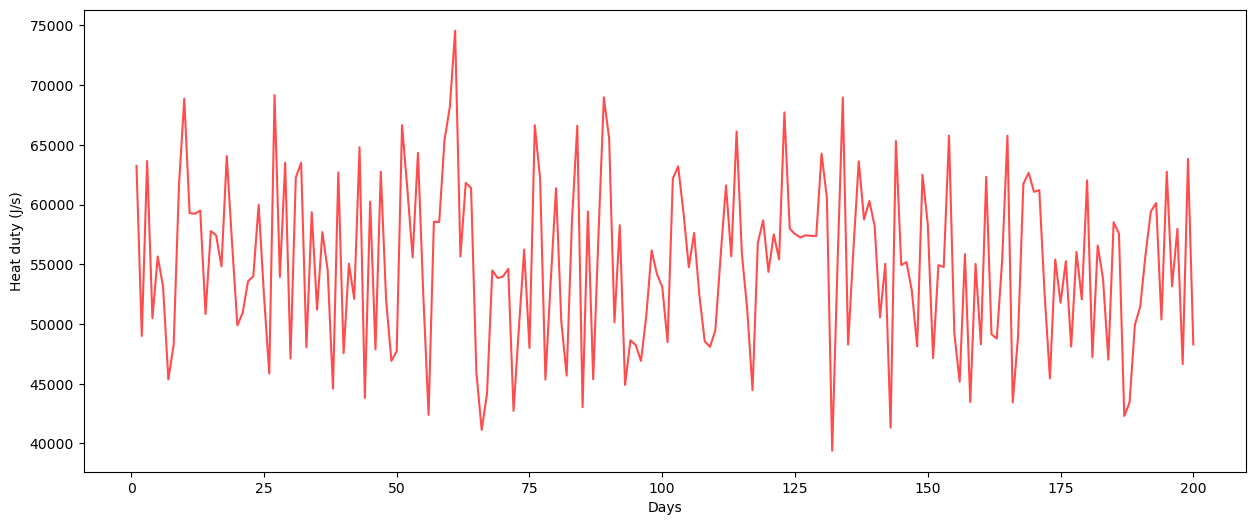

In [6]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["Q"].to_numpy(), c="r", alpha=0.7)
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.show()

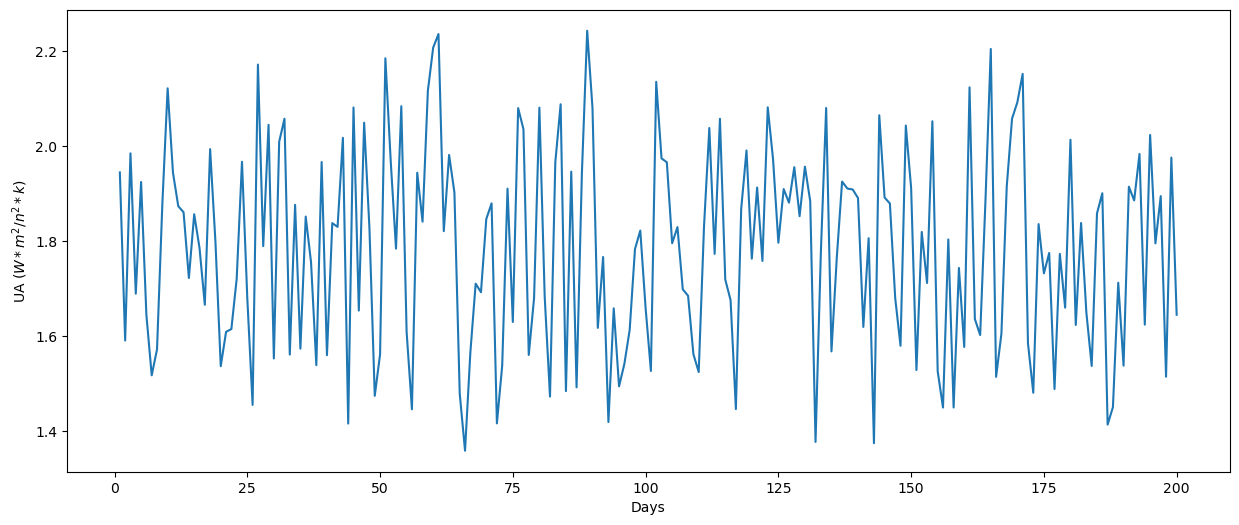

In [7]:
# UA vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["UA"].to_numpy())
plt.ylabel("UA ($W*m^2/n^2*k$)")
plt.xlabel("Days")
plt.show()

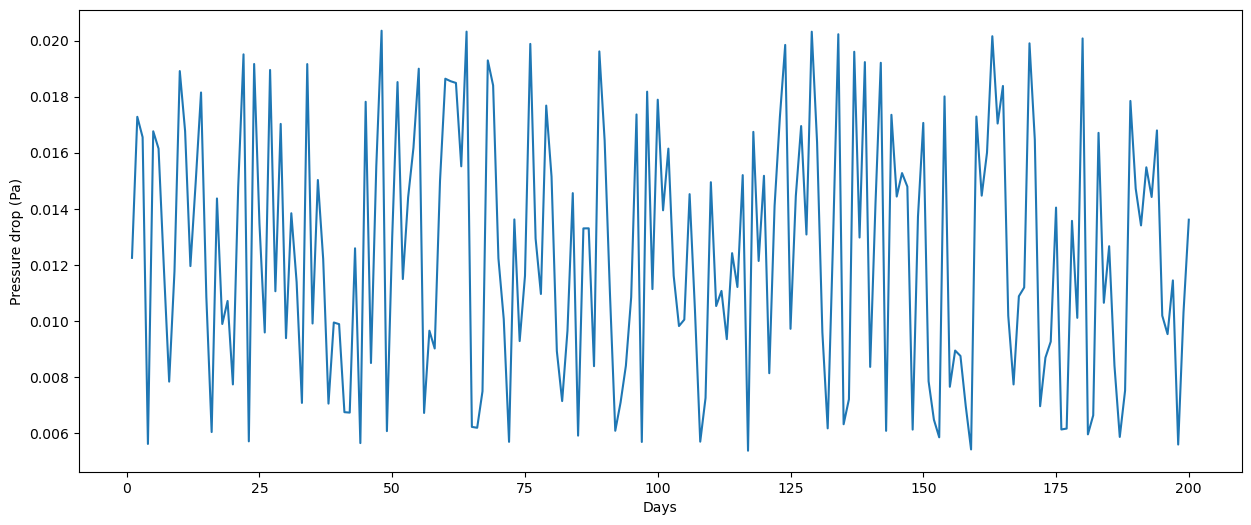

In [8]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["dP"].to_numpy())
plt.ylabel("Pressure drop (Pa)")
plt.xlabel("Days")
plt.show()

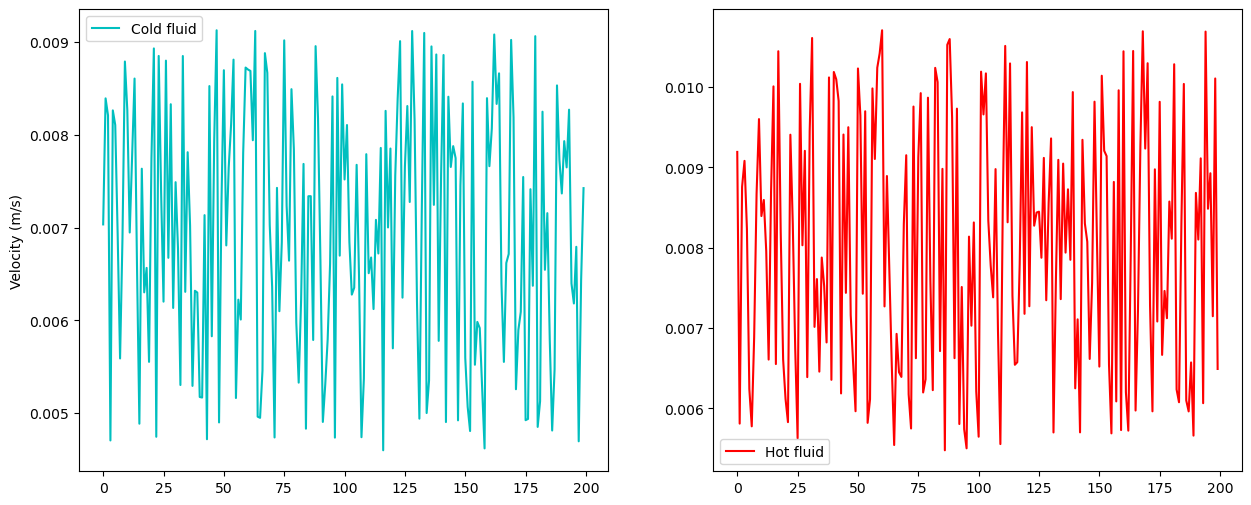

In [9]:
# Velocity vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(dfs["F1v"], c="c", label="Cold fluid")
ax[1].plot(dfs["F2v"], c="r", label="Hot fluid")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].legend()
ax[1].legend()
plt.show()


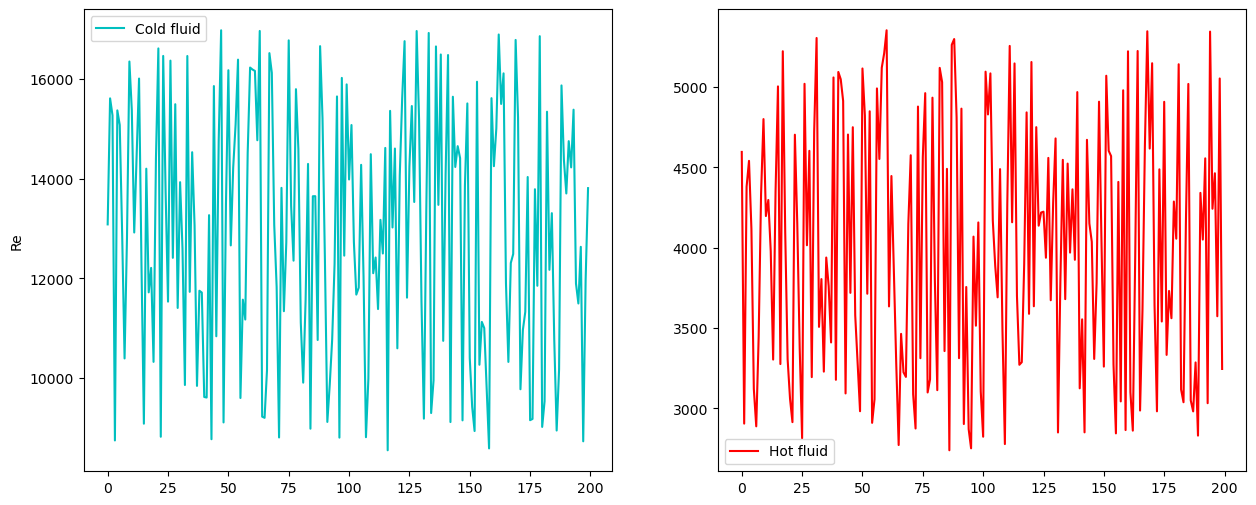

In [10]:
# Re vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(dfs["F1Re"], c="c", label="Cold fluid")
ax[1].plot(dfs["F2Re"], c="r", label="Hot fluid")
ax[0].set_ylabel("Re")
ax[0].legend()
ax[1].legend()
plt.show()


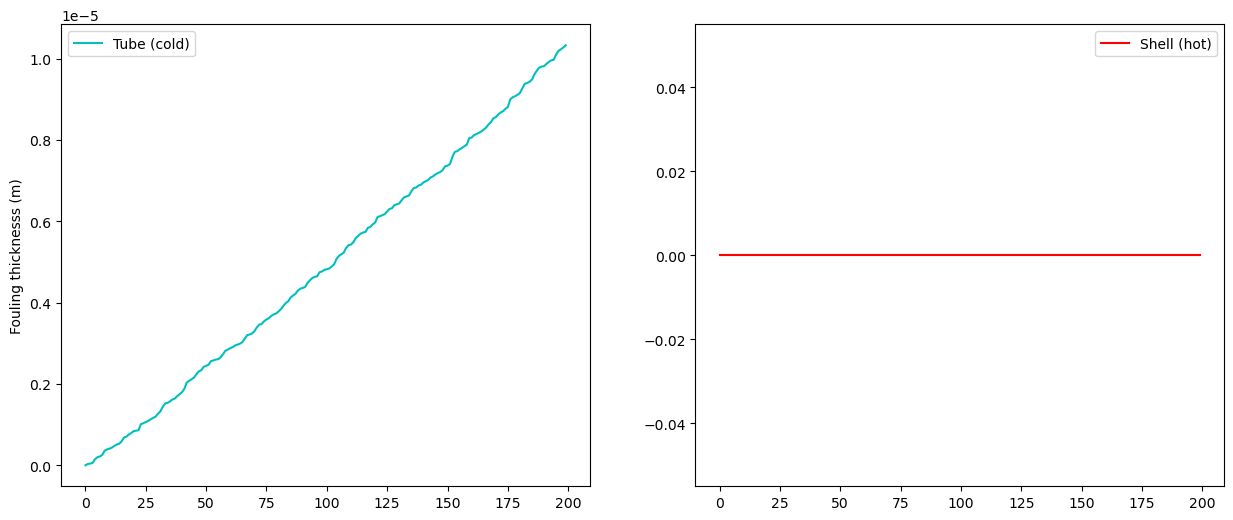

In [11]:
# Fouling thickness vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(dfs["Sigma1"], c="c", label="Tube (cold)")
ax[1].plot(dfs["Sigma2"], c="r", label="Shell (hot)")
ax[0].set_ylabel("Fouling thicknesss (m)")
ax[0].legend()
ax[1].legend()
plt.show()